# Pymaceuticals Inc.
---

### Analysis

- From this data, there is direct correlation for the Capomulin drug regimen in the mouse weight and their average tumor volume. The bigger the mice were, the more average volume was.
- When looking at the boxplot chart, on average Infubinol and Ceftamin had bigger tumor volumes than Capomulin and Ramicane. 
- There were more mice being observed when on Capomulin and Ramicane, making their data more accurate becauase of more test subjects. Also noticed that there was not much a difference between male and female mices. They were pretty evenly distributed. 
 

In [190]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results_df, mouse_metadata_df, on='Mouse ID')
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [164]:
#Checking the number of mice.
unique_mice_count = merged_df['Mouse ID'].nunique()
print(unique_mice_count)
# num_mice = combined_df["Mouse ID"].nunique()
# print("Number of mice: {num_mice}")
# num_mice

249


In [165]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [166]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID']
duplicate_data = merged_df[merged_df['Mouse ID'].isin(duplicate_mice)]
duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [167]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
print(clean_df.head())
clean_df


  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [168]:
# Checking the number of mice in the clean DataFrame
clean_mice_count = clean_df['Mouse ID'].nunique()
print(clean_mice_count)

249


## Summary Statistics

In [192]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped = clean_df.groupby('Drug Regimen')
mean = grouped['Tumor Volume (mm3)'].mean()
median = grouped['Tumor Volume (mm3)'].median()
variance = grouped['Tumor Volume (mm3)'].var()
std_dev = grouped['Tumor Volume (mm3)'].std()
sem = grouped['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    ' Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume Std. Err.': sem

    
})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [189]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df = pd.DataFrame(summary_stats)
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

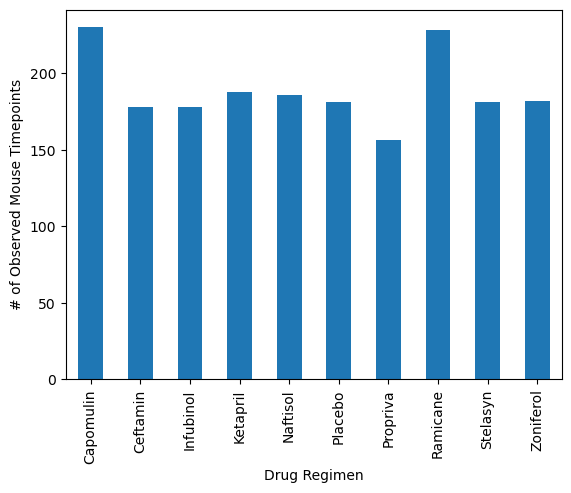

In [171]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df.groupby('Drug Regimen').size()
regimen_counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

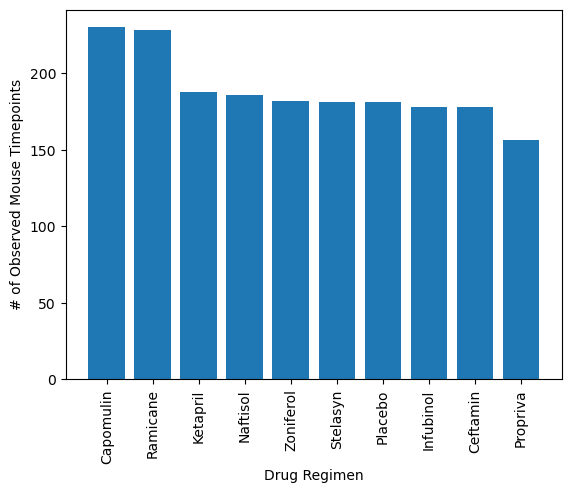

In [172]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_df['Drug Regimen'].value_counts()
plt.bar(regimen_counts.index, regimen_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

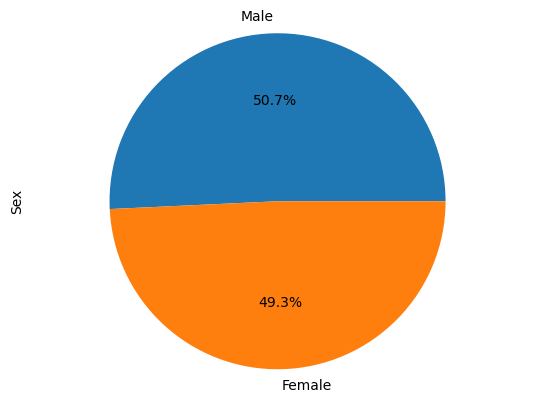

In [173]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd
sex_distribution = clean_df['Sex'].value_counts()
sex_distribution.plot(kind='pie', autopct='%1.1f%%',)
plt.axis('equal')  
plt.show()


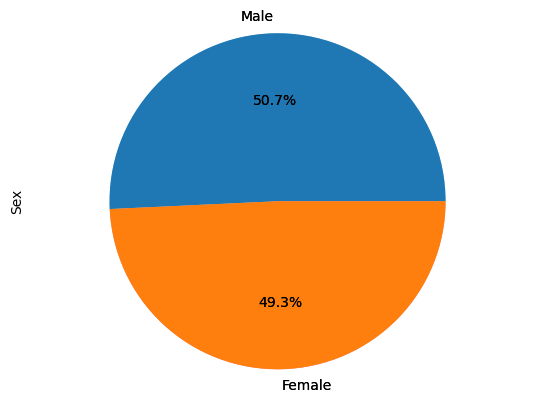

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
gender_distribution = clean_df['Sex'].value_counts()
plt.pie(gender_distribution, labels=['Male', 'Female'], colors=['skyblue', 'lightcoral'], autopct='%.1f%%')
gender_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [191]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# List of the specified treatment regimens
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data to include only the specified treatment regimens
specified_treatments = clean_df[clean_df['Drug Regimen'].isin(specified_regimens)]

# Find the final tumor volume for each mouse in the specified treatment regimens
# Display the final tumor volume for each mouse across the specified treatment regimens
# Start by getting the last (greatest) timepoint for each mouse
max_tumor = specified_treatments.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_tumor

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor = specified_treatments.merge(max_tumor,on=['Mouse ID', 'Timepoint'],how="inner")
final_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [176]:
# Put treatments into a list for for loop (and later for plot labels)
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in specified_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = final_tumor.loc[final_tumor["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = final_tumor_volume[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"Potential outliers for {drug}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 4    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


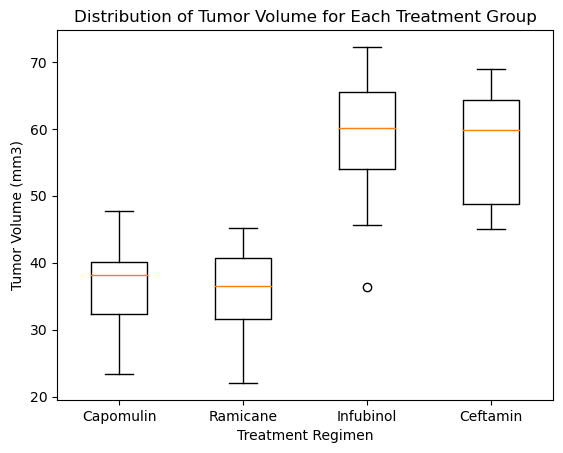

In [177]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_data = [final_tumor.loc[final_tumor["Drug Regimen"]==drug,"Tumor Volume (mm3)"] for drug in specified_regimens]
plt.boxplot(tumor_volume_data, labels=specified_regimens)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

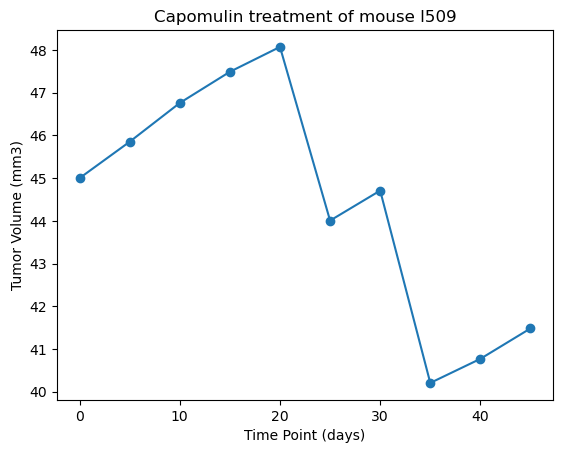

In [178]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
drug_regimen = 'Capomulin'
mouse_capomulin = combined_df[(combined_df['Mouse ID'] == mouse_id) & (combined_df['Drug Regimen'] == 'Capomulin')]
plt.plot(mouse_capomulin['Timepoint'], mouse_capomulin['Tumor Volume (mm3)'], marker='o')
plt.title(f'Capomulin treatment of mouse l509')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

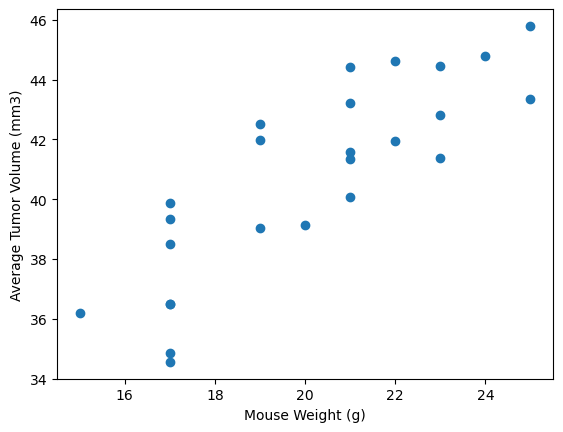

In [188]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_df[combined_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().str[0]
average_tumor_volume_df = pd.DataFrame({'Mouse Weight': mouse_weight, 'Average Tumor Volume': average_tumor_volume})

# Scatter plot 
plt.scatter(average_tumor_volume_df['Mouse Weight'], average_tumor_volume_df['Average Tumor Volume'], marker='o')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


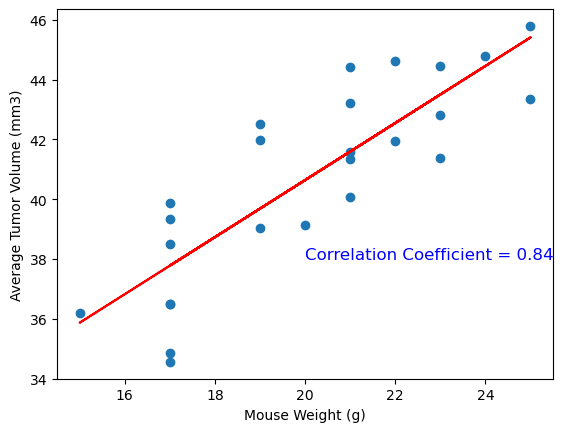

In [187]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r_value, p_value, std_err = linregress(average_tumor_volume_df['Mouse Weight'], average_tumor_volume_df['Average Tumor Volume'])
regression_line = slope * average_tumor_volume_df['Mouse Weight'] + intercept


plt.scatter(average_tumor_volume_df['Mouse Weight'], average_tumor_volume_df['Average Tumor Volume'], marker='o', label='Data Points')
plt.plot(average_tumor_volume_df['Mouse Weight'], regression_line, color='r', label='Regression Line')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.text(20, 38, f'Correlation Coefficient = {correlation_coefficient:.2f}', fontsize=12, color='b')
plt.show()


